# Stock Price analysis

This notebook demonstrates a variety of Pandas features and some plotting with matplotlib and Seaborn.

It was originally written by S. Mishra as a demonstration for the IS452 class in early 2017, adapting a non-Pandas homework assignment into a Pandas implementation.

The notebook was updated in Oct. 2018 by J. Weible to account for several deprecated features in Pandas since that time.  The original notebook is https://github.com/napsternxg/DataAnalysisPython

In [1]:
# You may need to run the command here the first time to install this package:
# !pip install pandas_datareader

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [3]:
sns.set_context("poster")
sns.set_style("ticks")

## Get the data from website

Example at: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance

In [4]:
start_date = datetime.datetime(1980, 12, 12)
end_date = datetime.datetime(2018, 10, 4)

print("Start date: {}\nEnd date: {}".format(start_date, end_date))

Start date: 1980-12-12 00:00:00
End date: 2018-10-04 00:00:00


In [5]:
# This part can fail randomly, based on Yahoo's system availability.  
# It needs to be wrapped in a function that catches exceptions and retries.

df = web.DataReader("AAPL", 'yahoo', start_date, end_date)
print("Data contains {} rows and {} columns".format(*df.shape))

Data contains 9534 rows and 6 columns


In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.415317
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.393649
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.364757
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.373786
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.384620


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007


We need the data in the reverse order. So let us do that.

In [8]:
df.loc[df.index.sort_values(ascending=False)].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997


In [9]:
df = df.loc[df.index.sort_values(ascending=False)]
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997


In [10]:
df["Daily Price Range"] = (df["High"] - df["Low"])
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range
Date,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009


## Finding the delta change

We will use the pandas shift function

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html

In [11]:
(df["Adj Close"] - df["Adj Close"].shift(-1)).head()

Date
2018-10-03    2.790009
2018-10-02    2.020004
2018-10-01    1.519989
2018-09-28    0.790009
2018-09-27    4.529999
Name: Adj Close, dtype: float64

In [12]:
(df["Adj Close"] - df["Adj Close"].shift(-1)).tail()

Date
1980-12-18    0.010834
1980-12-17    0.009029
1980-12-16   -0.028892
1980-12-15   -0.021669
1980-12-12         NaN
Name: Adj Close, dtype: float64

In [13]:
df["Delta Change"] = (df["Adj Close"] - df["Adj Close"].shift(-1))
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change
Date,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002,2.790009
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995,2.020004
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992,1.519989
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992,0.790009
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009,4.529999


In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change
Date,,,,,,,,
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.384620,0.002232,0.010834
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.373786,0.002232,0.009029
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.364757,0.002232,-0.028892
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.393649,0.002232,-0.021669
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.415317,0.002232,NaN


We should fill the **NaN value** with zero. We could have done that in one go by directly calling the function on the returned value above. 

In [15]:
df["Delta Change"] = df["Delta Change"].fillna(0)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change
Date,,,,,,,,
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.384620,0.002232,0.010834
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.373786,0.002232,0.009029
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.364757,0.002232,-0.028892
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.393649,0.002232,-0.021669
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.415317,0.002232,0.000000


In [16]:
((df["Delta Change"]/df["Adj Close"].shift(-1)) * 100).fillna(0).head()

Date
2018-10-03    1.216856
2018-10-02    0.888852
2018-10-01    0.673336
2018-09-28    0.351193
2018-09-27    2.055167
dtype: float64

In [17]:
df["% Change"] = ((df["Delta Change"]/df["Adj Close"].shift(-1)) * 100).fillna(0)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change
Date,,,,,,,,,
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.384620,0.002232,0.010834,2.898542
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.373786,0.002232,0.009029,2.475257
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.364757,0.002232,-0.028892,-7.339473
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.393649,0.002232,-0.021669,-5.217390
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.415317,0.002232,0.000000,0.000000


Now let us find the volatility value and save it as an integer.

In [18]:
df["Volatility"] = (df["% Change"].abs()*df["Volume"])
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002,2.790009,1.216856,3.475744e+07
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995,2.020004,0.888852,2.203303e+07
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992,1.519989,0.673336,1.589127e+07
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992,0.790009,0.351193,8.052644e+06
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009,4.529999,2.055167,6.202740e+07


## Fixing the formatting of the table

Always try to keep the looks of the data away from the actual data. Becase transforms are irreversible.

In [19]:
df.assign(
    Double_high=df["High"]*2,
).head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility,Double_high
Date,,,,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002,2.790009,1.216856,3.475744e+07,466.940002
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995,2.020004,0.888852,2.203303e+07,460.000000
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992,1.519989,0.673336,1.589127e+07,458.839996
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992,0.790009,0.351193,8.052644e+06,451.679993
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009,4.529999,2.055167,6.202740e+07,452.880005


In [20]:
df.assign(**{
     "% Change": lambda x: x["% Change"].map("{0:.2f}%".format),
     "Delta Change": lambda x: x["Delta Change"].map("{0:.3f}".format),
     "Daily Price Range": lambda x: x["Daily Price Range"].map("{0:.3f}".format),
    "Volatility": lambda x: x["Volatility"].astype(int),
    }).head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690,2.790,1.22%,34757436
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.370,2.020,0.89%,22033033
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.070,1.520,0.67%,15891271
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.820,0.790,0.35%,8052643
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900,4.530,2.06%,62027402


The above transform only changes the look of the dataframe and doesn't edit the original dataframe.

In [21]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002,2.790009,1.216856,3.475744e+07
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995,2.020004,0.888852,2.203303e+07
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992,1.519989,0.673336,1.589127e+07
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992,0.790009,0.351193,8.052644e+06
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009,4.529999,2.055167,6.202740e+07


## Reordering columns

In [22]:
COLUMN_ORDER = ["Open", "High", "Low", "Daily Price Range","Close",
                "Volume", "Adj Close", "Delta Change", "% Change",
                "Volatility"
               ]
df[COLUMN_ORDER].head()

,Open,High,Low,Daily Price Range,Close,Volume,Adj Close,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,230.050003,233.470001,229.779999,3.690002,232.070007,28563300.0,232.070007,2.790009,1.216856,3.475744e+07
2018-10-02,227.250000,230.000000,226.630005,3.369995,229.279999,24788200.0,229.279999,2.020004,0.888852,2.203303e+07
2018-10-01,227.949997,229.419998,226.350006,3.069992,227.259995,23600800.0,227.259995,1.519989,0.673336,1.589127e+07
2018-09-28,224.789993,225.839996,224.020004,1.819992,225.740005,22929400.0,225.740005,0.790009,0.351193,8.052644e+06
2018-09-27,223.820007,226.440002,223.539993,2.900009,224.949997,30181200.0,224.949997,4.529999,2.055167,6.202740e+07


Now let us merge all the transforms and get the final dataframe.

In [23]:
df.assign(**{
     "% Change": lambda x: x["% Change"].map("{0:.2f}%".format),
     "Delta Change": lambda x: x["Delta Change"].map("{0:.3f}".format),
     "Daily Price Range": lambda x: x["Daily Price Range"].map("{0:.3f}".format),
        "Volatility": lambda x: x["Volatility"].astype(int),
    })[COLUMN_ORDER].head()

,Open,High,Low,Daily Price Range,Close,Volume,Adj Close,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,230.050003,233.470001,229.779999,3.690,232.070007,28563300.0,232.070007,2.790,1.22%,34757436
2018-10-02,227.250000,230.000000,226.630005,3.370,229.279999,24788200.0,229.279999,2.020,0.89%,22033033
2018-10-01,227.949997,229.419998,226.350006,3.070,227.259995,23600800.0,227.259995,1.520,0.67%,15891271
2018-09-28,224.789993,225.839996,224.020004,1.820,225.740005,22929400.0,225.740005,0.790,0.35%,8052643
2018-09-27,223.820007,226.440002,223.539993,2.900,224.949997,30181200.0,224.949997,4.530,2.06%,62027402


Great. Now all we have to do is to save this to a file.

In [24]:
df.assign(**{
     "% Change": lambda x: x["% Change"].map("{0:.2f}%".format),
     "Delta Change": lambda x: x["Delta Change"].map("{0:.3f}".format),
     "Daily Price Range": lambda x: x["Daily Price Range"].map("{0:.3f}".format),
    })[COLUMN_ORDER].to_csv("Apple_stock_detail.csv")

! head Apple_stock_detail.csv

Date,Open,High,Low,Daily Price Range,Close,Volume,Adj Close,Delta Change,% Change,Volatility
2018-10-03,230.0500030517578,233.47000122070312,229.77999877929688,3.690,232.07000732421875,28563300.0,232.07000732421875,2.790,1.22%,34757436.97463892
2018-10-02,227.25,230.0,226.6300048828125,3.370,229.27999877929688,24788200.0,229.27999877929688,2.020,0.89%,22033033.141303733
2018-10-01,227.9499969482422,229.4199981689453,226.35000610351562,3.070,227.25999450683594,23600800.0,227.25999450683594,1.520,0.67%,15891271.303682813
2018-09-28,224.7899932861328,225.83999633789062,224.02000427246094,1.820,225.74000549316406,22929400.0,225.74000549316406,0.790,0.35%,8052643.776696523
2018-09-27,223.82000732421875,226.44000244140625,223.5399932861328,2.900,224.9499969482422,30181200.0,224.9499969482422,4.530,2.06%,62027402.36524385
2018-09-26,221.0,223.75,219.75999450683594,3.990,220.4199981689453,23984700.0,220.4199981689453,-1.770,-0.80%,19106629.91458814
2018-09-25,219.75,222.82000732421875,219.6999

* If you see above the jupyter notebook allows you to view file contents right in the notebook.
* Also, the original dataframe is still the same, while the file is correctly saved.

In [25]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002,2.790009,1.216856,3.475744e+07
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995,2.020004,0.888852,2.203303e+07
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992,1.519989,0.673336,1.589127e+07
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992,0.790009,0.351193,8.052644e+06
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009,4.529999,2.055167,6.202740e+07


## Summary statistics

In [26]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
count,9534.000000,9534.000000,9534.000000,9534.000000,9.534000e+03,9534.000000,9534.000000,9534.000000,9534.000000,9.534000e+03
mean,25.488109,24.998100,25.249361,25.249072,8.786822e+07,23.684420,0.490009,0.024298,0.108878,2.432646e+08
std,45.449872,44.716304,45.082215,45.093831,8.695551e+07,43.557836,0.894068,0.717146,2.889539,1.199323e+09
min,0.198661,0.196429,0.198661,0.196429,3.472000e+05,0.158904,0.000000,-8.112267,-51.869151,0.000000e+00
25%,1.067857,1.026786,1.044732,1.046540,3.410120e+07,0.916800,0.033482,-0.027695,-1.343343,2.643236e+07
50%,1.687500,1.625000,1.656339,1.658571,5.987030e+07,1.435362,0.069286,0.000000,0.000000,7.687349e+07
75%,25.112501,24.380357,24.796071,24.751071,1.098990e+08,21.935774,0.592857,0.036718,1.490235,2.094098e+08
max,233.470001,229.779999,230.050003,232.070007,1.855410e+09,232.070007,16.800003,11.170837,33.227856,9.623855e+10


In [27]:
df["High"].max()

233.47000122070312

In [28]:
df.index.max()

Timestamp('2018-10-03 00:00:00')

In [29]:
df.index.max().strftime("%Y-%d-%m")

'2018-03-10'

In [30]:
df.index.max().strftime("%m/%d/%Y")

'10/03/2018'

In [31]:
print("Range of dates: {} to {}".format(
        df.index.min().strftime("%Y-%d-%m"),
        df.index.max().strftime("%Y-%d-%m")
    ))

Range of dates: 1980-12-12 to 2018-03-10


In [32]:
print("Lowest Adjusted Close: ", df["Adj Close"].min())
print("Highest Adjusted Close: ", df["Adj Close"].max())

Lowest Adjusted Close:  0.1589040905237198
Highest Adjusted Close:  232.07000732421875


In [33]:
print("Biggest daily loss: ", df["% Change"].min())
print("Biggest daily gain: ", df["% Change"].max())

Biggest daily loss:  -51.869150917701255
Biggest daily gain:  33.22785609722912


In [34]:
df["% Change"].idxmin().strftime("%Y-%d-%m")

'2000-29-09'

In [35]:
print("Biggest daily loss: ", df["% Change"].idxmin().strftime("%Y-%d-%m"))
print("Biggest daily gain: ", df["% Change"].idxmax().strftime("%Y-%d-%m"))

Biggest daily loss:  2000-29-09
Biggest daily gain:  1997-06-08


In [36]:
print("Highest daily Volatility: ", df["Volatility"].max())

Highest daily Volatility:  96238551678.04227


In [37]:
print("Average adjusted closing price: ", df["Adj Close"].mean())
print("Average daily trading volume: ", df["Volume"].mean())

Average adjusted closing price:  23.68441967583469
Average daily trading volume:  87868224.01929934


## Write summary to file

In [38]:
with open("Apple_stock_summary.txt", "w+") as fp:
    print("Range of dates: {} to {}".format(
        df.index.min().strftime("%Y-%d-%m"),
        df.index.max().strftime("%Y-%d-%m")
    ), file=fp)
    print("Lowest Adjusted Close: ", df["Adj Close"].min(), file=fp)
    print("Highest Adjusted Close: ", df["Adj Close"].max(), file=fp)
    print("Biggest daily loss: {} on {}".format(
            df["% Change"].min(),
            df["% Change"].idxmin().strftime("%Y-%d-%m")
        ), file=fp)
    print("Biggest daily gain: {} on {}".format(
            df["% Change"].max(),
            df["% Change"].idxmax().strftime("%Y-%d-%m")
        ), file=fp)
    print("Highest daily Volatility: ", df["Volatility"].max(), file=fp)
    print("Average adjusted closing price: ", df["Adj Close"].mean(), file=fp)
    print("Average daily trading volume: ", df["Volume"].mean(), file=fp)
    
! head Apple_stock_summary.txt

Range of dates: 1980-12-12 to 2018-03-10
Lowest Adjusted Close:  0.1589040905237198
Highest Adjusted Close:  232.07000732421875
Biggest daily loss: -51.869150917701255 on 2000-29-09
Biggest daily gain: 33.22785609722912 on 1997-06-08
Highest daily Volatility:  96238551678.04227
Average adjusted closing price:  23.68441967583469
Average daily trading volume:  87868224.01929934


## Describing the dataframe

In [39]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
count,9534.000000,9534.000000,9534.000000,9534.000000,9.534000e+03,9534.000000,9534.000000,9534.000000,9534.000000,9.534000e+03
mean,25.488109,24.998100,25.249361,25.249072,8.786822e+07,23.684420,0.490009,0.024298,0.108878,2.432646e+08
std,45.449872,44.716304,45.082215,45.093831,8.695551e+07,43.557836,0.894068,0.717146,2.889539,1.199323e+09
min,0.198661,0.196429,0.198661,0.196429,3.472000e+05,0.158904,0.000000,-8.112267,-51.869151,0.000000e+00
25%,1.067857,1.026786,1.044732,1.046540,3.410120e+07,0.916800,0.033482,-0.027695,-1.343343,2.643236e+07
50%,1.687500,1.625000,1.656339,1.658571,5.987030e+07,1.435362,0.069286,0.000000,0.000000,7.687349e+07
75%,25.112501,24.380357,24.796071,24.751071,1.098990e+08,21.935774,0.592857,0.036718,1.490235,2.094098e+08
max,233.470001,229.779999,230.050003,232.070007,1.855410e+09,232.070007,16.800003,11.170837,33.227856,9.623855e+10


## Selecting subset of data

In [40]:
df[df["% Change"] > 0].head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-10-03,233.470001,229.779999,230.050003,232.070007,28563300.0,232.070007,3.690002,2.790009,1.216856,3.475744e+07
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,229.279999,3.369995,2.020004,0.888852,2.203303e+07
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,227.259995,3.069992,1.519989,0.673336,1.589127e+07
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,225.740005,1.819992,0.790009,0.351193,8.052644e+06
2018-09-27,226.440002,223.539993,223.820007,224.949997,30181200.0,224.949997,2.900009,4.529999,2.055167,6.202740e+07


In [41]:
df[(df["% Change"] > 0) & (df["Daily Price Range"] < 1)].head()

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2018-07-13,191.839996,190.899994,191.080002,191.330002,12513900.0,190.661331,0.940002,0.298950,0.157043,1.965216e+06
2017-11-24,175.500000,174.649994,175.100006,174.970001,14026700.0,172.983475,0.850006,0.009888,0.005716,8.018088e+04
2017-10-13,157.279999,156.410004,156.729996,156.990005,16394200.0,154.651642,0.869995,0.975250,0.634613,1.040397e+07
2017-07-26,153.929993,153.059998,153.350006,153.460007,15781000.0,150.582916,0.869995,0.706512,0.471397,7.439112e+06
2017-04-27,144.160004,143.309998,143.919998,143.789993,14246300.0,140.514191,0.850006,0.107468,0.076540,1.090415e+06


How many days have positive % change and how many have negative.

In [42]:
print("Days with positive % change: ", df[df["% Change"] > 0].shape[0])
print("Days with zero % change: ", df[df["% Change"] == 0.].shape[0])
print("Days with negative % change: ", df[df["% Change"] < 0].shape[0])

Days with positive % change:  4701
Days with zero % change:  367
Days with negative % change:  4466


## Filter along the index and along columns

In [43]:
df.loc[df["% Change"] > 0, ["Open", "High", "Adj Close", "Delta Change"]].head()

,Open,High,Adj Close,Delta Change
Date,,,,
2018-10-03,230.050003,233.470001,232.070007,2.790009
2018-10-02,227.250000,230.000000,229.279999,2.020004
2018-10-01,227.949997,229.419998,227.259995,1.519989
2018-09-28,224.789993,225.839996,225.740005,0.790009
2018-09-27,223.820007,226.440002,224.949997,4.529999


## Sort by days with highest change

In [44]:
df.sort_values("% Change", ascending=False).head(10)

,High,Low,Open,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
1997-08-06,0.991071,0.892857,0.901786,0.939732,1.047620e+09,0.832843,0.098214,0.207716,33.227856,3.481017e+10
1998-01-02,0.580357,0.482143,0.486607,0.580357,1.795276e+08,0.514345,0.098214,0.098912,23.809519,4.274466e+09
1996-07-18,0.776786,0.727118,0.767857,0.745536,2.242632e+08,0.660735,0.049668,0.126608,23.703708,5.315869e+09
1998-01-06,0.714286,0.526786,0.569196,0.676339,4.531184e+08,0.599409,0.187500,0.096934,19.291309,8.741247e+09
1993-10-15,1.017857,0.955357,0.991071,1.008929,2.388120e+08,0.868638,0.062500,0.138367,18.947386,4.524863e+09
1987-10-29,1.428571,1.151786,1.223214,1.410714,8.288000e+07,1.144429,0.276786,0.173837,17.910458,1.484419e+09
1987-10-21,1.500000,1.357143,1.375000,1.446429,1.335600e+08,1.173401,0.142857,0.173837,17.391305,2.322783e+09
1997-07-11,0.553571,0.475446,0.477679,0.542411,1.837360e+08,0.480715,0.078125,0.061326,14.622618,2.686701e+09
1999-10-14,2.618304,2.464286,2.473214,2.613839,4.747008e+08,2.316530,0.154018,0.289816,14.299779,6.788116e+09


## Grouping the data

Let us say, we are interested in knowing the max, min, and mean values of High, Low, Open, and Close for each year. 
We can use the groupby functionality of pandas here.

In [45]:
df.index.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980],
           dtype='int64', name='Date', length=9534)

In [46]:
df.groupby(df.index.year)[["Open", "High", "Low", "Close"]].agg([
        np.max, np.min, np.mean,
    ])

Open                                High                          \
            amax        amin        mean        amax        amin        mean   
Date                                                                           
1980    0.642857    0.453125    0.544299    0.645089    0.453125    0.545845   
1981    0.616071    0.256696    0.435472    0.620536    0.258929    0.437004   
1982    0.604911    0.198661    0.341783    0.622768    0.198661    0.346661   
1983    1.120536    0.319196    0.669096    1.129464    0.343750    0.684341   
1984    0.593750    0.404018    0.479822    0.613839    0.406250    0.489175   
1985    0.546875    0.261161    0.364229    0.555804    0.263393    0.368091   
1986    0.779018    0.392857    0.578346    0.783482    0.397321    0.588192   
1987    2.125000    0.720982    1.391269    2.133929    0.734375    1.423225   
1988    1.683036    1.276786    1.484137    1.705357    1.312500    1.506652   
1989    1.776786    1.205357    1.486253    1.799107    1.232143    1.510718   
1990    1.696429    0.901786    1.339356    1.705357    0.946429    1.364977   
1991    2.589286    1.464286    1.873271    2.616071    1.500000    1.908050   
1992    2.500000    1.500000    1.957273    2.500000    1.562500    1.985781   
1993    2.285714    0.808036    1.466544    2.330357    0.821429    1.492077   
1994    1.544643    0.897321    1.216161    1.562500    0.933036    1.239692   
1995    1.750000    1.142857    1.450822    1.790179    1.156250    1.473821   
1996    1.241071    0.620536    0.894562    1.267857    0.620536    0.907911   
1997    1.026786    0.459821    0.644022    1.055804    0.473214    0.655718   
1998    1.553571    0.486607    1.089720    1.562500    0.580357    1.116638   
1999    4.162946    1.151786    2.059269    4.214286    1.196429    2.110708   
2000    5.087054    0.984371    3.270769    5.370536    1.044643    3.375799   
2001    1.907143    1.035714    1.440377    1.937143    1.089286    1.483310   
2002    1.852143    0.967143    1.366290    1.869286    0.989286    1.394433   
2003    1.775000    0.927857    1.322985    1.786429    0.942143    1.345964   
2004    4.925000    1.530000    2.530105    4.969285    1.553571    2.573532   
2005   10.695714    4.556428    6.661491   10.780000    4.636428    6.757378   
2006   13.285714    7.390000   10.141087   13.308572    7.555714   10.277018   
2007   28.655714   11.857142   18.341298   28.994286   12.067142   18.581497   
2008   28.467142   11.704286   20.330536   28.608572   12.017143   20.730096   
2009   30.447144   11.341429   20.945584   30.564285   11.714286   21.213668   
2010   46.602856   27.481428   37.136803   46.665714   28.000000   37.481258   
2011   60.251427   45.240002   52.008775   60.957142   45.385715   52.489082   
2012  100.344284   58.485714   82.378960  100.724289   58.928570   83.117914   
2013   81.807144   55.424286   67.589734   82.162857   57.085712   68.234132   
2014  119.269997   70.739998   92.219830  119.750000   71.647141   93.012664   
2015  134.460007   94.870003  120.175754  134.539993  107.029999  121.244524   
2016  118.180000   90.000000  104.507778  118.690002   91.669998  105.427183   
2017  175.110001  115.800003  150.444900  177.199997  116.330002  151.406056   
2018  230.050003  154.830002  187.941309  233.470001  157.889999  189.684555   

             Low                               Close                          
            amax        amin        mean        amax        amin        mean  
Date                                                                          
1980    0.642857    0.450893    0.543613    0.642857    0.450893    0.543613  
1981    0.616071    0.254464    0.434125    0.616071    0.254464    0.434125  
1982    0.589286    0.196429    0.338518    0.604911    0.196429    0.341835  
1983    1.095982    0.308036    0.653797    1.120536    0.319196    0.669096  
1984    0.580357    0.390625    0.470567    0.593750    0.390625    0.478605  
1985    0.546875   

In [47]:
df.groupby(df.index.year)["Open"].agg([
        np.max, np.min, np.mean,
    ])

,amax,amin,mean
Date,,,
1980,0.642857,0.453125,0.544299
1981,0.616071,0.256696,0.435472
1982,0.604911,0.198661,0.341783
1983,1.120536,0.319196,0.669096
1984,0.593750,0.404018,0.479822
1985,0.546875,0.261161,0.364229
1986,0.779018,0.392857,0.578346
1987,2.125000,0.720982,1.391269
1988,1.683036,1.276786,1.484137


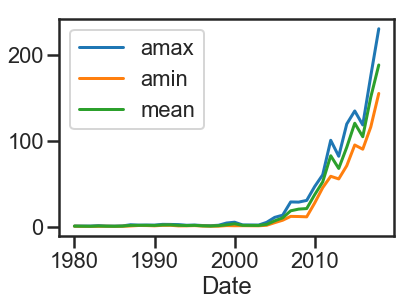

In [48]:
df.groupby(df.index.year)[["Open", "High", "Low", "Close"]].agg([
        np.max, np.min, np.mean,
    ])["Open"].plot()

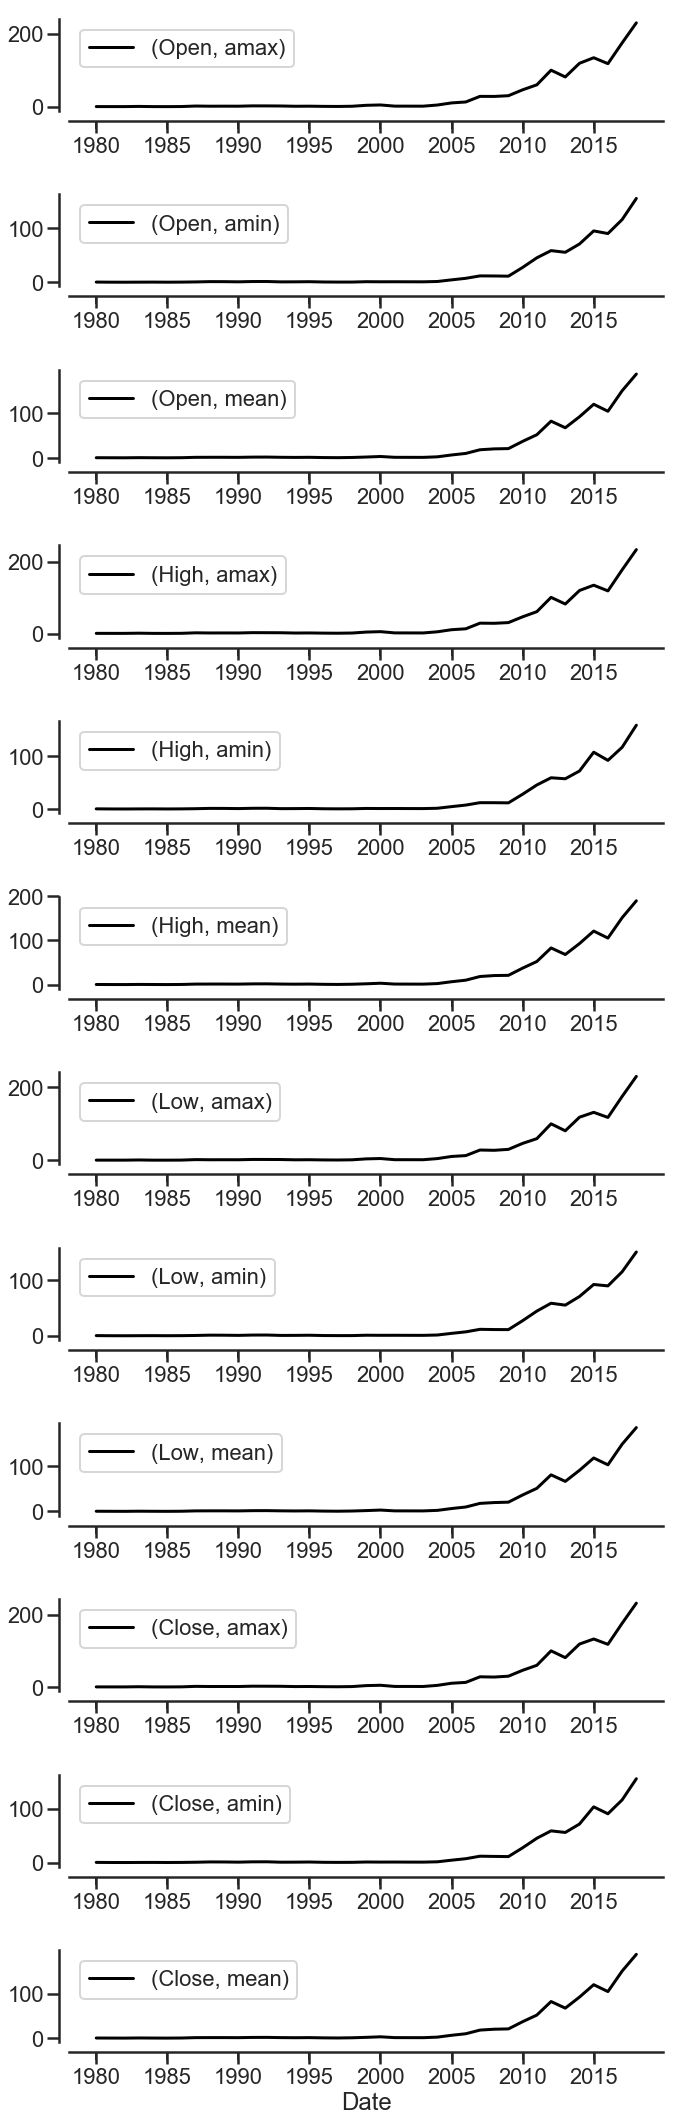

In [49]:
df.groupby(df.index.year)[["Open", "High", "Low", "Close"]].agg([
        np.max, np.min, np.mean,
    ]).plot(subplots=True, figsize=(10, 30), color="k")
sns.despine(offset=10)
plt.gcf().tight_layout()

## Plotting the data

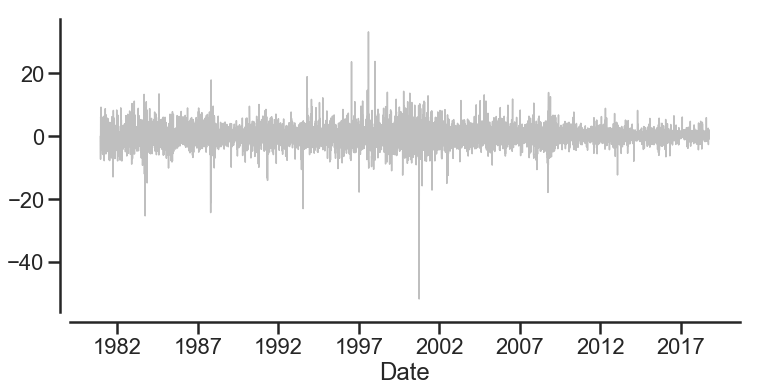

In [50]:
df["% Change"].plot(color="0.5", alpha=0.5, lw=1.5, figsize=(12,6))
sns.despine(offset=10)

Plot only % change between the years 2013 to 2016